In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
#Cargamos el archivo diamonds.csv
diamantes = pd.read_csv('diamonds.csv')
diamantes

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,NaN,58.0,2757.0,6.15,6.12,3.74


In [3]:
df_numeric=diamantes.copy()
df_numeric=df_numeric.drop(['cut','color','clarity'],axis=1)
df_numeric

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,NaN,58.0,2757.0,6.15,6.12,3.74


In [4]:
#Remplazamos los valores faltantes por la media aritmetica
df2=df_numeric.copy
df2=df_numeric.fillna(round(diamantes.mean(),1))
df2

/var/folders/zv/01rx8f0176x702fr56drfp1m0000gn/T/ipykernel_1898/591177780.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2=df_numeric.fillna(round(diamantes.mean(),1))


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74


***************PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME*****************

In [5]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=df2
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido carat        2.219953
depth       66.047217
table       64.160560
price    15901.154414
x            9.096441
y            9.160929
z            5.655794
dtype: float64
Limite inferior permitido carat      -0.624090
depth      57.451571
table      50.753974
price   -8035.391985
x           2.365894
y           2.308121
z           1.421668
dtype: float64


In [6]:
#Encontramos Ouliers del Dataframe
outliers= df2[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,carat,depth,table,price,x,y,z
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,56.9,65.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
53935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53938,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Obtenemos datos sin outliers del DataFrame
df3= df2[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df3

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,NaN,NaN,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74


In [8]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
df_clean=df3.copy()
df_clean=df_clean.fillna(round(df3.mean(),1))
df_clean

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,61.7,57.4,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74


In [9]:
#Archivo con datos limpios
df_clean.to_csv('diamonds2.csv')

***************PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME*****************

In [10]:
#Cargamos el archivo diamonds.csv
df4 = pd.read_csv('diamonds2.csv')
df4

,Unnamed: 0,carat,depth,table,price,x,y,z
0,0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,2,0.23,61.7,57.4,327.0,4.05,4.07,2.31
3,3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74


In [13]:
#CARAT

#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df4[['carat']]
Var_Dep= df4['price']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model_carat= LinearRegression()
type(model_carat)
model_carat.fit(X=Vars_Indep, y=Var_Dep)
model_carat.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['carat'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([6524.32217555]),
 'rank_': 1,
 'singular_': array([104.13800591]),
 'intercept_': -1489.9771929141666}

In [14]:
#MODELO PREDICTIVO
#Predecimos los valores de total de accidentes a partir de la variable 
y_pred= model_carat.predict(X=df4[['carat']])
y_pred

array([  10.61690746, -119.86953605,   10.61690746, ..., 3077.04832997,
       4120.93987806, 3403.26443875])

In [15]:
#Insertamos la columna de predicciones en el DataFrame
df4.insert(0, 'Predicciones', y_pred)
df4

,Predicciones,Unnamed: 0,carat,depth,table,price,x,y,z
0,10.616907,0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,-119.869536,1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,10.616907,2,0.23,61.7,57.4,327.0,4.05,4.07,2.31
3,402.076238,3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,532.562682,4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,3207.534773,53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,3207.534773,53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,3077.048330,53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,4120.939878,53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74


<AxesSubplot:xlabel='carat', ylabel='price'>

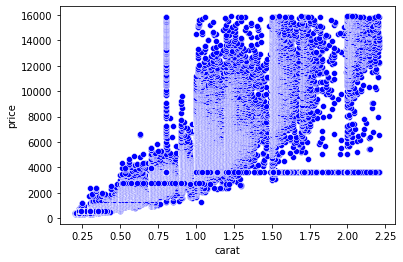

In [16]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='carat', y='price', color="blue", data=df4)

In [17]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
model_carat.score(X=Vars_Indep, y=Var_Dep)

0.723736317781156

DEPTH

In [18]:
#DEPTH

#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep1= df4[['depth']]
Var_Dep1= df4['price']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model_depth= LinearRegression()
type(model_depth)
model_depth.fit(X=Vars_Indep1, y=Var_Dep1)
model_depth.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['depth'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-6.37905433]),
 'rank_': 1,
 'singular_': array([295.83615478]),
 'intercept_': 4021.4734912098634}

In [19]:
#MODELO PREDICTIVO
#Predecimos los valores de total de accidentes a partir de la variable 
y_pred1= model_depth.predict(X=df4[['depth']])
y_pred1

array([3629.16164989, 3640.00604225, 3627.88583902, ..., 3620.86887926,
       3627.88583902, 3624.69631186])

In [21]:
#Insertamos la columna de predicciones en el DataFrame
df4.insert(0, 'Predicciones_depth', y_pred1)
df4

,Predicciones_depth,Predicciones,Unnamed: 0,carat,depth,table,price,x,y,z
0,3629.161650,10.616907,0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,3640.006042,-119.869536,1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,3627.885839,10.616907,2,0.23,61.7,57.4,327.0,4.05,4.07,2.31
3,3623.420501,402.076238,3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,3617.679352,532.562682,4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,3633.626988,3207.534773,53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,3618.955163,3207.534773,53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,3620.868879,3077.048330,53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,3627.885839,4120.939878,53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74


In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='depth', y='price', color="blue", data=df4)

In [22]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
model_depth.score(X=Vars_Indep1, y=Var_Dep1)

5.5834952963351725e-06

TABLE

In [23]:
#TABLE

#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep2= df4[['table']]
Var_Dep2= df4['price']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model_table= LinearRegression()
type(model_table)
model_table.fit(X=Vars_Indep2, y=Var_Dep2)
model_table.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['table'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([208.29125418]),
 'rank_': 1,
 'singular_': array([491.13052505]),
 'intercept_': -8329.24118401006}

In [24]:
#MODELO PREDICTIVO
#Predecimos los valores de total de accidentes a partir de la variable 
y_pred2= model_table.predict(X=df4[['table']])
y_pred2

array([3126.777796  , 4376.52532109, 3626.67680603, ..., 4168.23406691,
       3751.65155854, 3126.777796  ])

In [25]:
#Insertamos la columna de predicciones en el DataFrame
df4.insert(0, 'Predicciones_table', y_pred2)
df4

,Predicciones_table,Predicciones_depth,Predicciones,Unnamed: 0,carat,depth,table,price,x,y,z
0,3126.777796,3629.161650,10.616907,0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,4376.525321,3640.006042,-119.869536,1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,3626.676806,3627.885839,10.616907,2,0.23,61.7,57.4,327.0,4.05,4.07,2.31
3,3751.651559,3623.420501,402.076238,3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,3751.651559,3617.679352,532.562682,4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,3543.360304,3633.626988,3207.534773,53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,3126.777796,3618.955163,3207.534773,53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,4168.234067,3620.868879,3077.048330,53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,3751.651559,3627.885839,4120.939878,53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74


<AxesSubplot:xlabel='table', ylabel='price'>

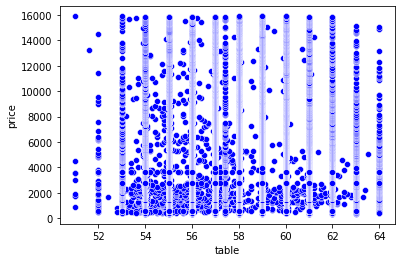

In [26]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='table', y='price', color="blue", data=df4)

In [27]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
model_table.score(X=Vars_Indep2, y=Var_Dep2)

0.01640691694328733

CARAT Y DEPTH

In [30]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep3= df4[['carat', 'depth']]
Var_Dep3= df4['price']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model_caratdepth= LinearRegression()
type(model_caratdepth)
model_caratdepth.fit(X=Vars_Indep3, y=Var_Dep3)
model_caratdepth.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['carat', 'depth'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([6525.36069016,  -32.34240827]),
 'rank_': 2,
 'singular_': array([295.83882763, 104.13041252]),
 'intercept_': 506.0797611357252}

In [31]:
#Predecimos los valores de total de accidentes a partir de la variables
y_pred3= model_caratdepth.predict(X=df4[['carat', 'depth']])
y_pred3

array([  17.85461155,  -57.67050821,   11.38612989, ..., 3042.72900518,
       4122.36336469, 3388.40248464])

In [32]:
#Insertamos la columna de predicciones en el DataFrame
df4.insert(0, 'Predic_caratdepth', y_pred3)
df4

,Predic_caratdepth,Predicciones_table,Predicciones_depth,Predicciones,Unnamed: 0,carat,depth,table,price,x,y,z
0,17.854612,3126.777796,3629.161650,10.616907,0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,-57.670508,4376.525321,3640.006042,-119.869536,1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,11.386130,3626.676806,3627.885839,10.616907,2,0.23,61.7,57.4,327.0,4.05,4.07,2.31
3,380.268086,3751.651559,3623.420501,402.076238,3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,481.667132,3751.651559,3617.679352,532.562682,4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3237.921036,3543.360304,3633.626988,3207.534773,53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,3163.533497,3126.777796,3618.955163,3207.534773,53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,3042.729005,4168.234067,3620.868879,3077.048330,53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,4122.363365,3751.651559,3627.885839,4120.939878,53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74


<AxesSubplot:xlabel='carat', ylabel='Predicciones'>

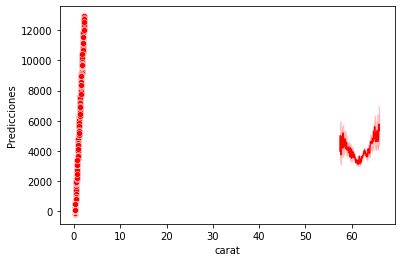

In [35]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

#sns.scatterplot(x='carat', y='total', color="blue", data=df)
sns.scatterplot(x='carat', y='Predicciones', color="red", data=df4)
sns.lineplot(x='depth', y='Predicciones', color="red", data=df4)